In [52]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import h5py
from localized_states2d import WfnParams, Wavefunction, HamiltParams, Hamilt, mypcolormesh

ImportError: cannot import name 'mypcolormesh' from 'localized_states2d' (/nfs/scistore12/lemesgrp/fkluiben/paper_calculations/rotor_lattice_models/mf_localized/localized_states2d.py)

In [89]:
def get_e_for_coupling(dir,Mx,My,V_0_arr):
    e_arr = np.zeros(len(V_0_arr), dtype=complex)
    for i in range(len(V_0_arr)):
        V_0 = V_0_arr[i]
        file_path = dir+'data_V0_'+str(V_0)+'_'+str(int(Mx))+'x'+str(int(My))+'.h5'

        with h5py.File(file_path, 'r') as f:
            phi_data = f["wfn"][...]
            Mx = f["Mx"][...]
            My = f["My"][...]
            n = f["n"][...]
            B = f["B"][...]
            tx = f["tx"][...]
            ty = f["ty"][...]
            V_0 = f["V0"][...]

        wfnpar = WfnParams(Mx, My, n)
        Mx, My, n, x, k2 = wfnpar.read()

        wfn = Wavefunction(wfnpar, array=phi_data)

        hamiltpar = HamiltParams(B, tx, ty, V_0)

        H = Hamilt(wfnpar, hamiltpar)
        energy_tot, energy_rot, energy_ele, energy_int = H.calculate_energy(wfn)

        e_arr[i] = energy_tot

    return e_arr

In [90]:
wfnpar = WfnParams(10, 10, 64)
Mx, My, n, phi, k2 = wfnpar.read()

Remarks on the convergence: Convergence with tol parameter - 1e-8 is sufficient and is a compromise between accuracy and computation. Also, the convergence in the system size is good for 30x30.

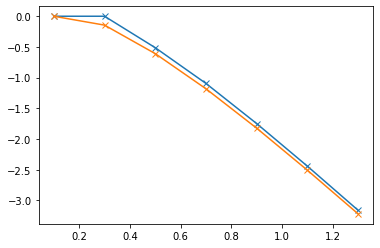

In [95]:
V_0_arr = np.array([0.1,0.3,0.5,0.7,0.9,1.1,1.3])

dir_sym = 'data/delta_t_0/'
e_sym = get_e_for_coupling(dir_sym,30,30,V_0_arr)

dir_asym = 'data/delta_t_-0.4/'
e_asym = get_e_for_coupling(dir_asym,30,30,V_0_arr)

plt.plot(V_0_arr, e_sym+2, marker='x')
plt.plot(V_0_arr, e_asym+2, marker='x')

In [ ]:
print("-3.181350698137572")
pritn("-3.094447512568821")

In [78]:
print("-4.092375068778869") # 1e-5
print("-4.09288797844427") # 1e-8
print("-4.092888486482012") # 1e-10
print("-4.0914853711018") # 10x10 vs 5x5
print(energy_tot.real) # 1e-10

-4.092375068778869
-4.09288797844427
-4.092888486482012
-4.0914853711018
-3.094447512568821


In [79]:
phi - 2*np.pi/n * np.arange(n)

ValueError: operands could not be broadcast together with shapes (64,) (256,) 

NameError: name 'mypcolormesh' is not defined

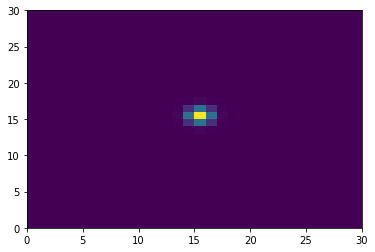

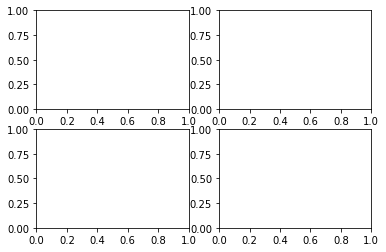

In [80]:
wfn = Wavefunction(wfnpar, array=wfn)
wfn.initialize_localized(1.0)

plt.pcolormesh(np.abs(wfn.elewfn)**2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
mypcolormesh(ax1, np.arange(wfnpar.Mx), np.arange(wfnpar.Mx), np.abs(wfn.elewfn)**2)
mypcolormesh(ax2, np.arange(wfnpar.Mx), np.arange(wfnpar.Mx),
             np.abs(wfn.elewfn_shift(0, 1))**2)
mypcolormesh(ax3, np.arange(wfnpar.Mx), np.arange(wfnpar.Mx), 
             np.abs(wfn.elewfn_shift(1, 0))**2)
mypcolormesh(ax4, np.arange(wfnpar.Mx), np.arange(wfnpar.Mx),
             np.abs(wfn.elewfn_shift(1, 1))**2)

In [6]:
wfn.rotwfn_d2dx()

array([[[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+

Let us now put the eigenstates of the Harmonic oscillator as the rotor states to check the differentiation, shift operators etc.

In [7]:
rotbasis_example = np.sin(np.arange(Mx)[np.newaxis, :, np.newaxis]*phi[:, np.newaxis, np.newaxis]) \
    + np.cos(np.arange(My)[np.newaxis, np.newaxis, :]*phi[:, np.newaxis, np.newaxis])        

wfn2 = Wavefunction(wfnpar)
wfn2.construct(wfn.elewfn, rotbasis_example)

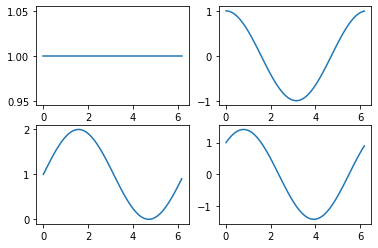

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn2.rotwfn[:, 0, 0].real)
ax2.plot(phi, wfn2.rotwfn[:, 0, 1].real)
ax3.plot(phi, wfn2.rotwfn[:, 1, 0].real)
ax4.plot(phi, wfn2.rotwfn[:, 1, 1].real)

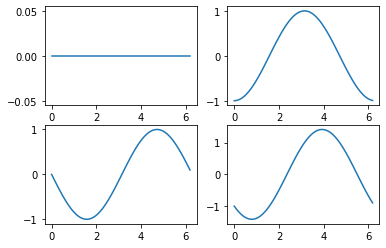

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn2.rotwfn_d2dx()[:, 0, 0].real)
ax2.plot(phi, wfn2.rotwfn_d2dx()[:, 0, 1].real)
ax3.plot(phi, wfn2.rotwfn_d2dx()[:, 1, 0].real)
ax4.plot(phi, wfn2.rotwfn_d2dx()[:, 1, 1].real)

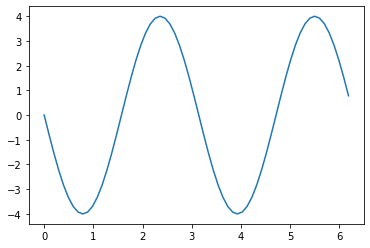

In [10]:
plt.plot(phi, wfn2.rotwfn_d2dx()[:, 2, 0].real)

In [11]:
wfn2.rotwfn_d2dx().dtype

dtype('complex128')

In [12]:
wfn2.rotwfn.dtype

dtype('complex128')

In [13]:
wfn2.elewfn.dtype

dtype('complex128')

In [14]:
wfn2.wfn

array([ 1.38879439e-11+0.j,  1.25015287e-09+0.j,  4.13993772e-08+0.j, ...,
        9.99200722e-16+0.j, -6.59036722e-02+0.j, -1.38617169e-01+0.j])

In [15]:
wfn2.normalize()

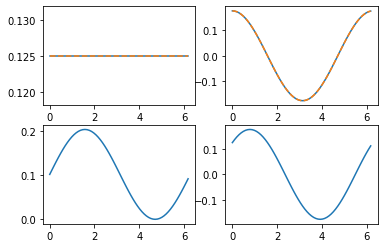

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn2.rotwfn[:, 0, 0].real)
ax1.plot(phi, np.full((n,), n**(-0.5)), linestyle='dashed')
ax2.plot(phi, wfn2.rotwfn[:, 0, 1].real)
ax2.plot(phi, np.sqrt(2)*n**(-0.5)*np.cos(phi), linestyle='dashed')
ax3.plot(phi, wfn2.rotwfn[:, 1, 0].real)
ax4.plot(phi, wfn2.rotwfn[:, 1, 1].real)

In [17]:
np.sum(np.full((n,), n**(-0.5))**2)

1.0

In [18]:
np.sum(np.abs(wfn2.rotwfn[:, 0, 0])**2)

1.0

In [19]:
np.sum((np.sqrt(2)*n**(-0.5)*np.cos(phi))**2)

1.0

In [20]:
np.sum(abs(wfn2.elewfn)**2)

0.9999999999999999

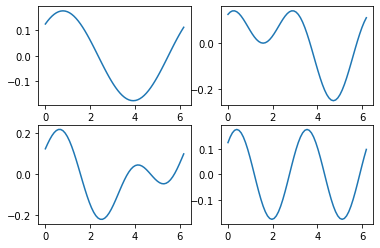

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn2.rotwfn_shift(-1, -1)[:, 0, 0].real)
ax2.plot(phi, wfn2.rotwfn_shift(-1, -1)[:, 0, 1].real)
ax3.plot(phi, wfn2.rotwfn_shift(-1, -1)[:, 1, 0].real)
ax4.plot(phi, wfn2.rotwfn_shift(-1, -1)[:, 1, 1].real)

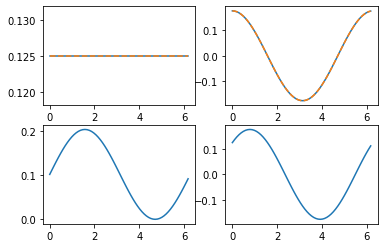

In [22]:
wfn3 = Wavefunction(wfnpar, array=wfn2.wfn)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn3.rotwfn[:, 0, 0].real)
ax1.plot(phi, np.full((n,), n**(-0.5)), linestyle='dashed')
ax2.plot(phi, wfn3.rotwfn[:, 0, 1].real)
ax2.plot(phi, np.sqrt(2)*n**(-0.5)*np.cos(phi), linestyle='dashed')
ax3.plot(phi, wfn3.rotwfn[:, 1, 0].real)
ax4.plot(phi, wfn3.rotwfn[:, 1, 1].real)